In [55]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import ceil, floor
import pywt

In [56]:
folder='../datasets'
filename='/brown.csv'
fname=f"{folder}/{filename}"
import os.path
os.path.isfile(fname) 

True

In [57]:
df = pd.read_csv(fname, header=None, usecols=[0], names=['data'], 
                 thousands=',',dtype={'data':np.float64}, verbose=True)
# lineterminator=','  --> user for certain CSV files

Tokenization took: 0.11 ms
Type conversion took: 0.14 ms
Parser memory cleanup took: 0.01 ms


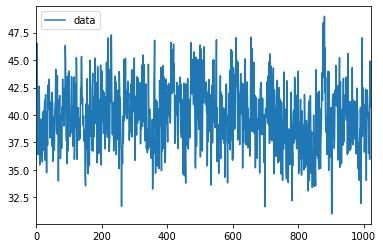

In [58]:
df.plot.line()

In [59]:
deltas = df['data'].diff().shift(-1).to_list()

In [60]:
norm_diffs = [
    1 if deltas[t] > 0 else 0 if deltas[t] == 0 else -1 for t in range(max(len(deltas) - 200, 0), len(deltas))]

In [65]:
direction = []
direction_index = 0
curr_value = norm_diffs[0]
direction.append(1 if curr_value >= 0 else -1)

for i in range(1, len(norm_diffs)):
    if norm_diffs[i] == curr_value:
        if curr_value >= 0:
            direction[direction_index] += 1
        elif curr_value < 0:
            direction[direction_index] -= 1
    else:
        curr_value = norm_diffs[i]
        direction_index += 1
        direction.append(1 if curr_value >= 0 else -1)

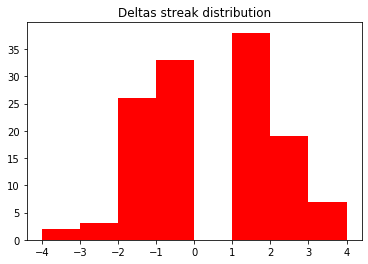

In [66]:
from math import ceil
plt.title("Deltas streak distribution")
count, bins, ignored  = plt.hist(direction, int(ceil(max(direction))-ceil(min(direction))), color='red')

In [67]:
# 
# Probability of hitting a trend change, after the first day of upward trend
#
count[np.where(bins == 1.0)[0]][0]/len(norm_diffs)

0.19

In [68]:
direction.count(1)

38